## What is the most Optimal Skills for a Data Analyst to learn?

### Methodology
1. Find percent of Job postings with skill
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

### Libraries Importation and Data Cleaning

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\User\Downloads\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def to_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    
df['job_skills'] = df['job_skills'].apply(to_list)
df_india = df[df['job_country'] == 'India'].copy()
df_india_da = df_india[df_india['job_title_short'] == 'Data Analyst']
df_india_da = df_india_da.dropna(subset= ['salary_year_avg'])
df_da_exploded = df_india_da.explode('job_skills')

###  Median salary vs percent skill demand

In [2]:
df_da_skills = df_da_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending= False)
df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_da_total = len(df_india_da)
df_da_skills['skill_percent'] = (df_da_skills['skill_count']/df_da_total)*100
df_da_skills = df_da_skills[df_da_skills['skill_percent'] > 0]
skill_limit = 5
df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_limit]
df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


### Categorizing Skills according to the Technology

In [3]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['esquisse',
  'tableau',
  'ms access',
  'nuix',
  'ssis',
  'spreadsheet',
  'outlook',
  'msaccess',
  'looker',
  'dax',
  'microstrategy',
  'spss',
  'sharepoint',
  'excel',
  'splunk',
  'powerbi',
  'datarobot',
  'visio',
  'word',
  'powerpoint',
  'sas',
  'sheets',
  'power bi',
  'sap',
  'qlik',
  'ssrs',
  'cognos',
  'alteryx'],
 'programming': ['pascal',
  'visualbasic',
  'solidity',
  'delphi',
  'haskell',
  'r',
  'sql',
  'c++',
  'powershell',
  'bash',
  'java',
  'f#',
  'visual basic',
  'html',
  'apl',
  'shell',
  'elixir',
  'golang',
  'swift',
  'vba',
  't-sql',
  'javascript',
  'clojure',
  'mongodb',
  'rust',
  'lisp',
  'css',
  'scala',
  'sass',
  'c#',
  'julia',
  'ocaml',
  'go',
  'kotlin',
  'objective-c',
  'no-sql',
  'erlang',
  'typescript',
  'vb.net',
  'nosql',
  'assembly',
  'c',
  'php',
  'crystal',
  'cobol',
  'sas',
  'lua',
  'groovy',
  'perl',
  'python',
  'matlab',
  'ruby',
  'fortran',
  'dart',
  'mo

In [4]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,esquisse
0,analyst_tools,tableau
0,analyst_tools,ms access
0,analyst_tools,nuix
0,analyst_tools,ssis
...,...,...
9,sync,slack
9,sync,unify
9,sync,wire
9,sync,twilio


In [5]:
df_DA_skills_tech = df_da_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,46,96050.0,48.936170,programming,sql
1,39,98500.0,41.489362,analyst_tools,excel
2,36,96050.0,38.297872,programming,python
3,20,108087.5,21.276596,analyst_tools,tableau
4,18,79200.0,19.148936,programming,r
...,...,...,...,...,...
80,1,79200.0,1.063830,sync,unify
81,1,105650.0,1.063830,other,unreal
82,1,119250.0,1.063830,analyst_tools,visio
83,1,79200.0,1.063830,os,windows


### Median salary vs percent skill demand - categorizing them by their technology

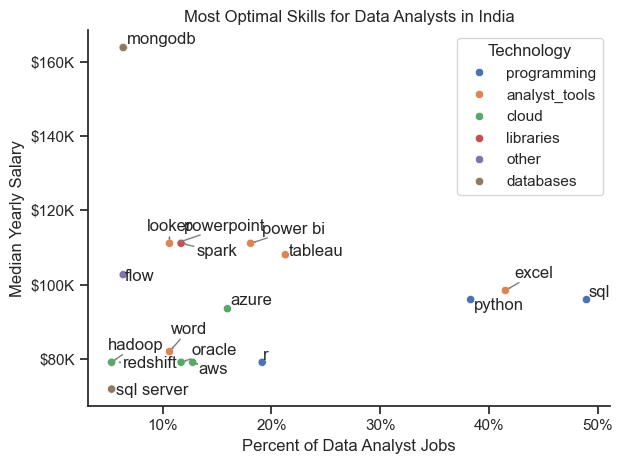

In [12]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

from adjustText import adjust_text

sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
# --- Auto adjust overlapping labels ---
texts = []
used_positions = set()

for i, txt in enumerate(df_da_skills_high_demand.index):
    x = df_da_skills_high_demand['skill_percent'].iloc[i]
    y = df_da_skills_high_demand['median_salary'].iloc[i]
    pos = (round(x, 1), round(y, -2))  # rounded for grouping

    # if another label is already at this coordinate, nudge horizontally
    if pos in used_positions:
        x += .6
    else:
        used_positions.add(pos)

    texts.append(plt.text(x, y, txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))


# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in India')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()
